# Task 1: Import Packages and Load Data

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [83]:
path = input('Input the data here:')
master_df = pd.read_csv(path)
master_df.head(5)

Input the data here:sales2019_10.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


# Task 2: Merge and Clean Data

In [78]:
master_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
master_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


### Task 2.1: Add the 'Month' Column in the Master DataFrame 

In [79]:
master_df['Month']= master_df['Order Date'].str[0:2]
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [80]:
print(set(master_df['Month']))

{nan, '01', '11', '05', '03', '02', '12', '07', '10', 'Or', '04', '08', '09', '06'}


### Task 2.2: Get Rid of NaN and Or Value

In [81]:
master_df = master_df.dropna(how = 'all')
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [82]:
master_df = master_df[master_df['Month'] != 'Or']
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


# Task 3: Report

### Task 3.1: What was the best month for sales? How much was earned that month?

In [12]:
print(master_df['Quantity Ordered'].dtypes)
print(master_df['Price Each'].dtypes)

object
object


In [13]:
master_df['Quantity Ordered'] = pd.to_numeric(master_df['Quantity Ordered'], downcast = "integer")
master_df['Price Each'] = pd.to_numeric(master_df['Price Each'], downcast = "float")

In [14]:
master_df['Sales'] = master_df['Quantity Ordered']*master_df['Price Each']
move_col = master_df.pop('Sales')
master_df.insert(4,'Sales',move_col)
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [15]:
master_df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [16]:
sales_value = master_df.groupby('Month').sum()['Sales']
max_value = sales_value.max()
max_value

4613443.5

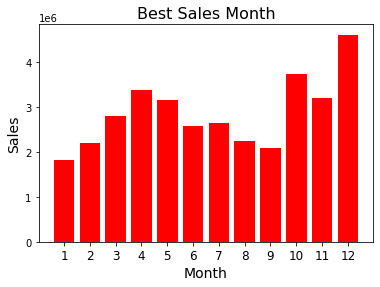

In [17]:
months = range(1,13)
plt.bar(x=months, height=sales_value, color = 'red')
plt.title('Best Sales Month', fontsize = 16)
plt.xticks(months, fontsize = 12)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.show()

### Task 3.2: What was the best city for sales? 

In [18]:
master_df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,944 Walnut St,Boston,MA 02215
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,185 Maple St,Portland,OR 97035
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,538 Adams St,San Francisco,CA 94016
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,738 10th St,Los Angeles,CA 90001
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,387 10th St,Austin,TX 73301


In [22]:
print(set(master_df['City']))

{' Atlanta', ' Boston', ' Portland', ' Austin', ' San Francisco', ' New York City', ' Dallas', ' Los Angeles', ' Seattle'}


In [20]:
master_df = master_df.dropna()
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,944 Walnut St,Boston,MA 02215
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,185 Maple St,Portland,OR 97035
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,538 Adams St,San Francisco,CA 94016
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,738 10th St,Los Angeles,CA 90001
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,387 10th St,Austin,TX 73301


In [21]:
sales_city_value = master_df.groupby('City').sum()['Sales']
sales_city_value

City
 Atlanta          1743583.125
 Austin           1156422.375
 Boston           2300216.000
 Dallas           1702238.125
 Los Angeles      3372174.000
 New York City    2900250.500
 Portland         1409843.625
 San Francisco    5184971.000
 Seattle          1643871.125
Name: Sales, dtype: float32

In [23]:
cities = []
for city, sales in sales_city_value.items():
    cities.append(city)
print (cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


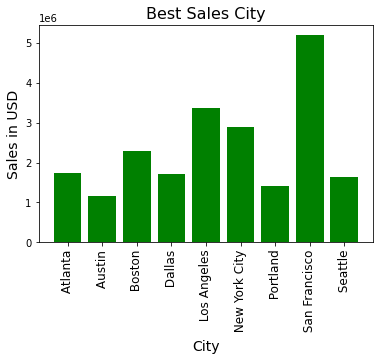

In [24]:
plt.bar(x=cities, height=sales_city_value, color = 'green')
plt.title('Best Sales City', fontsize = 16)
plt.xticks(cities, fontsize = 12, rotation = 90)
plt.xlabel('City',fontsize = 14)
plt.ylabel('Sales in USD',fontsize = 14)
plt.show()

### Task 3.3: What was the best hour for sales? 

In [27]:
print(master_df['Order Date'].dtypes)

datetime64[ns]


In [26]:
master_df['Order Date'] = pd.to_datetime(master_df['Order Date'])

In [28]:
master_df['Hour'] = master_df['Order Date'].dt.hour
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,944 Walnut St,Boston,MA 02215,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,185 Maple St,Portland,OR 97035,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,538 Adams St,San Francisco,CA 94016,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,738 10th St,Los Angeles,CA 90001,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,387 10th St,Austin,TX 73301,0


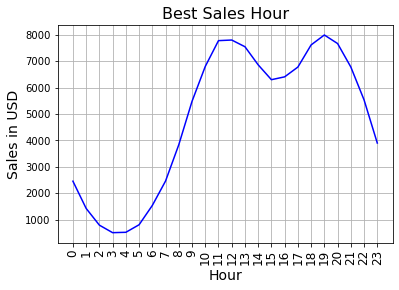

In [35]:
sales_hour_value = master_df.groupby('Hour').count()['Sales']

hours = []
for hour, sales in sales_hour_value.items():
    hours.append(hour)
    
plt.plot(hours, sales_hour_value, color = 'blue')
plt.title('Best Sales Hour', fontsize = 16)
plt.grid()
plt.xticks(hours, fontsize = 12, rotation = 90)
plt.xlabel('Hour',fontsize = 14)
plt.ylabel('Sales in USD',fontsize = 14)
plt.show()

### Task 3.4: What was the best couple of products for sales? 

In [54]:
master_df_dup = master_df[master_df['Order ID'].duplicated(keep=False)]
master_df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,944 Walnut St,Boston,MA 02215,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,185 Maple St,Portland,OR 97035,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,538 Adams St,San Francisco,CA 94016,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,937 Highland St,New York City,NY 10001,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,853 Ridge St,Boston,MA 02215,2


In [55]:
master_df_dup['All Product'] = master_df_dup.groupby('Order ID')['Product'].transform(','.join)
master_df_dup.head()

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_66910/3299101469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_dup['All Product'] = master_df_dup.groupby('Order ID')['Product'].transform(','.join)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour,All Product
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,944 Walnut St,Boston,MA 02215,20,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,185 Maple St,Portland,OR 97035,20,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,538 Adams St,San Francisco,CA 94016,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,937 Highland St,New York City,NY 10001,2,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,853 Ridge St,Boston,MA 02215,2,"iPhone,Lightning Charging Cable"


In [56]:
master_df_dup = master_df_dup[['Order ID', 'All Product']].drop_duplicates()
master_df_dup.head()

,Order ID,All Product
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [58]:
master_df_dup['All Product'].value_counts().head(10)

iPhone,Lightning Charging Cable                       555
Google Phone,USB-C Charging Cable                     546
iPhone,Wired Headphones                               215
Google Phone,Wired Headphones                         197
Vareebadd Phone,USB-C Charging Cable                  190
iPhone,Apple Airpods Headphones                       177
Google Phone,Bose SoundSport Headphones                93
Vareebadd Phone,Wired Headphones                       70
Google Phone,USB-C Charging Cable,Wired Headphones     48
iPhone,Lightning Charging Cable,Wired Headphones       43
Name: All Product, dtype: int64

### Task 3.5: What is the best product for sales?

In [60]:
all_product = master_df.groupby('Product').sum()['Quantity Ordered']
all_product

Product
20in Monitor                   2535.0
27in 4K Gaming Monitor         3844.0
27in FHD Monitor               4658.0
34in Ultrawide Monitor         3881.0
AA Batteries (4-pack)         17187.0
AAA Batteries (4-pack)        19309.0
Apple Airpods Headphones       9679.0
Bose SoundSport Headphones     8317.0
Flatscreen TV                  3023.0
Google Phone                   3477.0
LG Dryer                        392.0
LG Washing Machine              444.0
Lightning Charging Cable      14373.0
Macbook Pro Laptop             2887.0
ThinkPad Laptop                2567.0
USB-C Charging Cable          14942.0
Vareebadd Phone                1275.0
Wired Headphones              12946.0
iPhone                         4324.0
Name: Quantity Ordered, dtype: float64

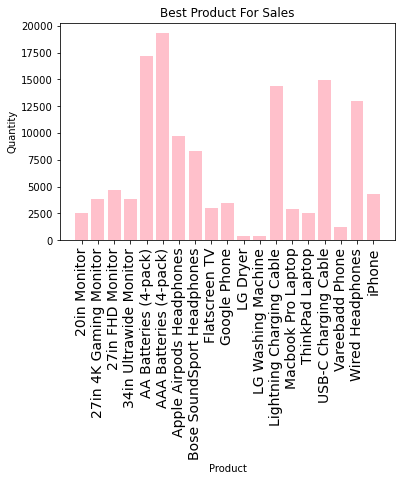

In [64]:
products = []
for pro, quant in all_product.items():
    products.append(pro)
plt.bar(products, all_product, color = 'pink')
plt.title('Best Product For Sales')
plt.xticks(products, rotation = 90, fontsize = 14)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

In [65]:
prices = master_df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_66910/2278398104.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 90, fontsize = 8)


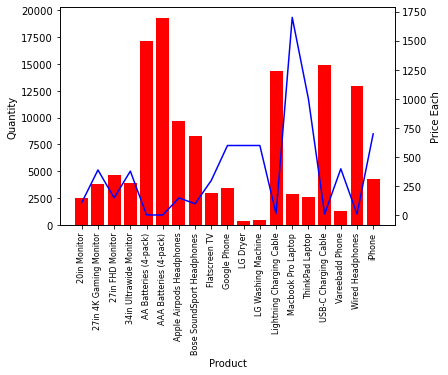

In [68]:
x = products
y1 = all_product
y2 = prices

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'red')
ax2.plot(x, y2,'b-')

ax1.set_xticklabels(products, rotation = 90, fontsize = 8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price Each')

plt.show()

# SIUUUUUUUUUUUUUUUUUUU!!!!